In [4]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/envs/work/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [5]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc', 
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'absth',
            'wgt',
            'planck_wgt_flux']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [6]:
analysis = scripts.Analysis()

In [7]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_30',
                          'g_descending',
                          'refPTs_P_1_T_250__P_200_T_250',
                          'ighigh_15',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all.3__all.3',
                          'bigsum',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [8]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_30',
                          'g_descending',
                          'refPTs_P_1_T_250__P_200_T_250',
                          'ighigh_15',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all.3__all.3',
                          'bigsum',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [9]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 30 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [10]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [11]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [12]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [13]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 340

nband = 200

nv = 200

dv = 0.005

tsfc = 294.0

pressure_reference_1 = 1.

temperature_reference_1 = 250.

pressure_reference_2 = 200.

temperature_reference_2 = 250.

ighigh = 15

ng = 30

data absth(:, 1) /

!     thresholds for reference (P, T) low
!     data absth(:, 2) /

data wgt
     &     /30 * .3/

planck_wgt_flux = 2

include 'mls75.pro'


In [14]:
fig.display_hrefanchor()

In [15]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [16]:
table_dgdgs.display_hrefanchor()

In [17]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [18]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [19]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate g-group 1

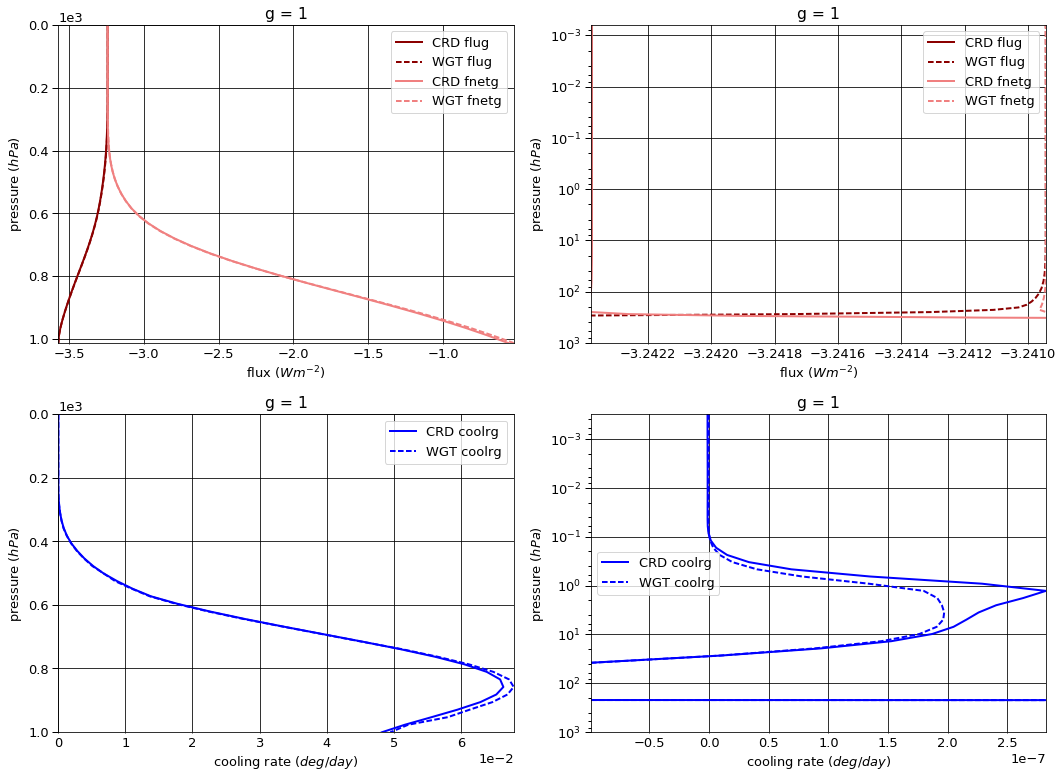

# Figure: flux, cooling rate g-group 2

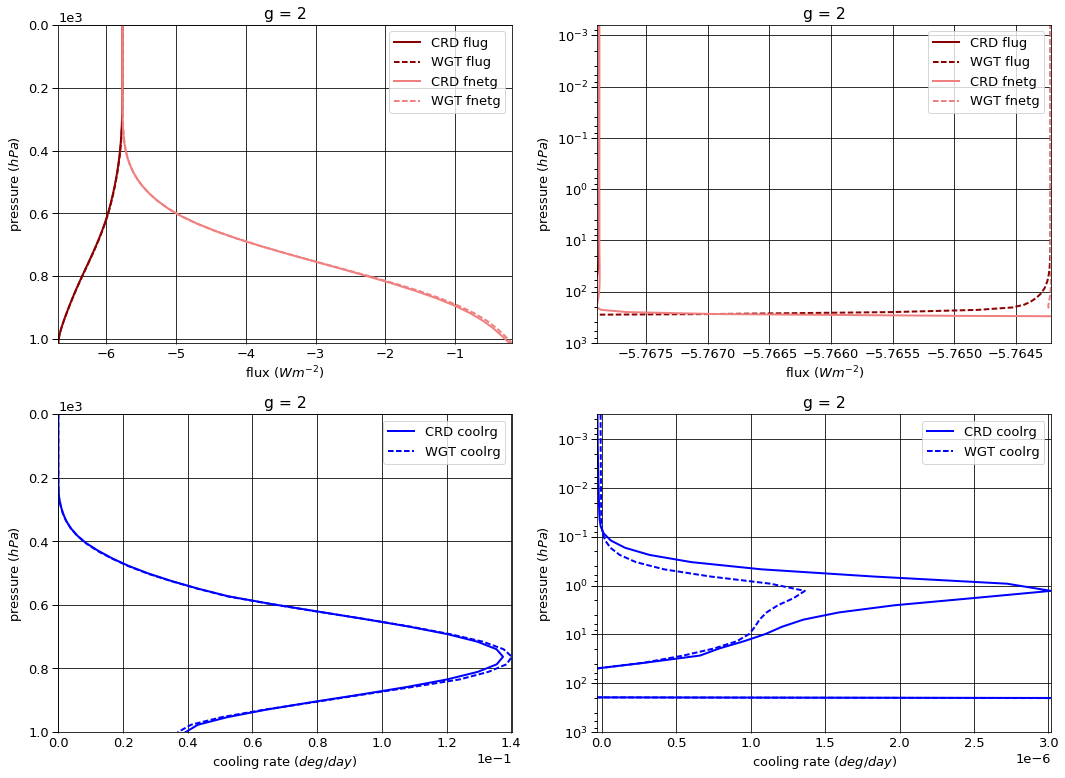

# Figure: flux, cooling rate g-group 3

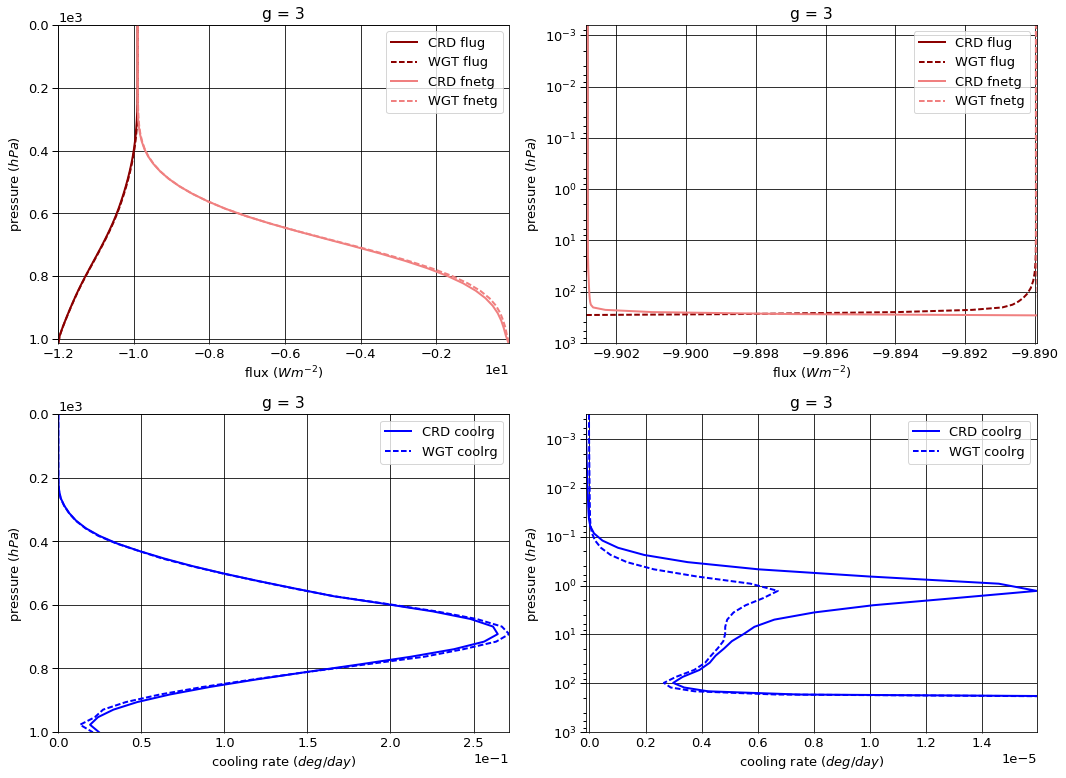

# Figure: flux, cooling rate g-group 4

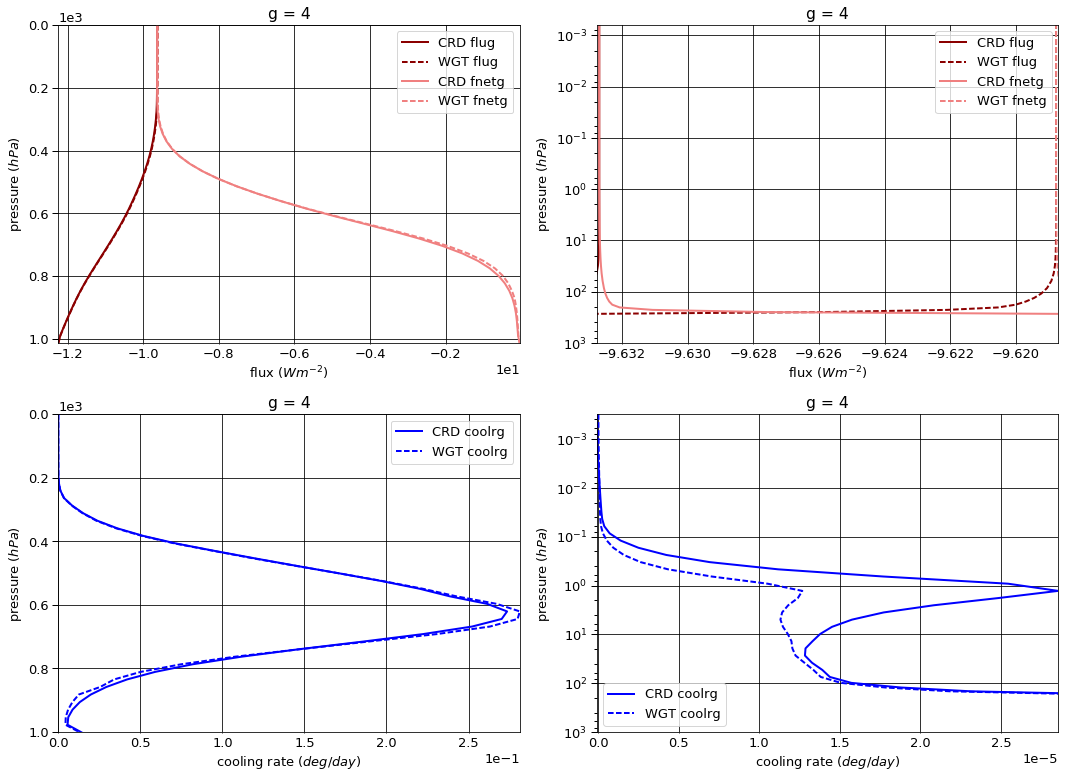

# Figure: flux, cooling rate g-group 5

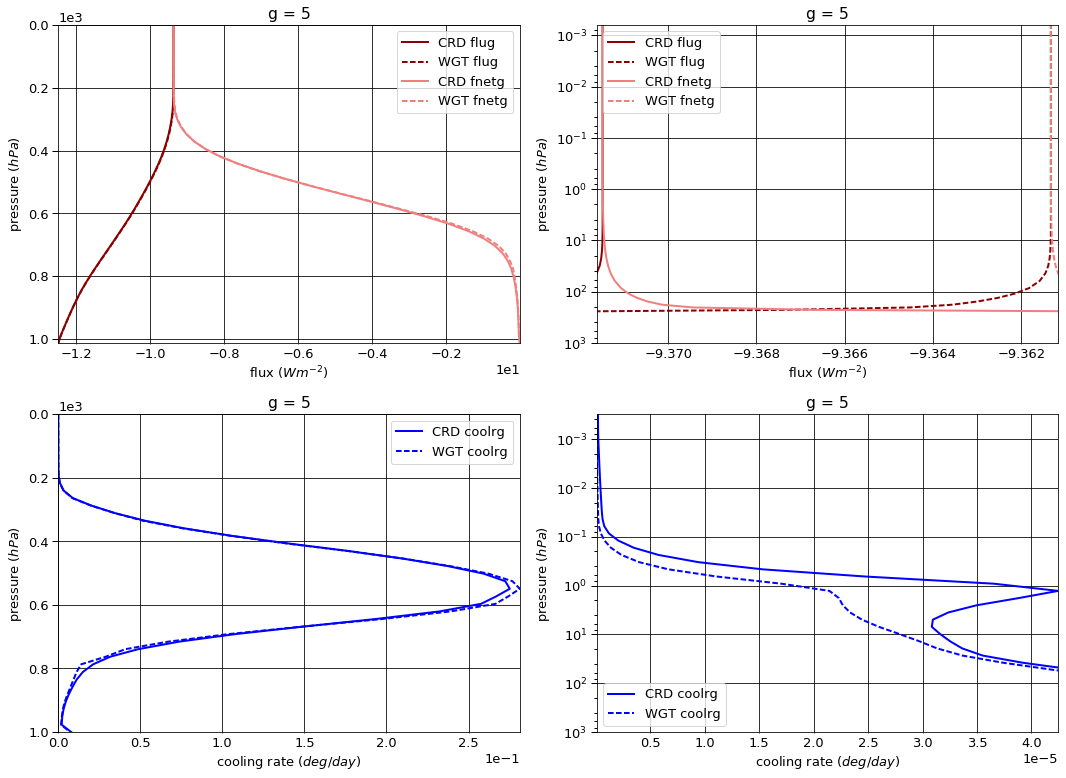

# Figure: flux, cooling rate g-group 6

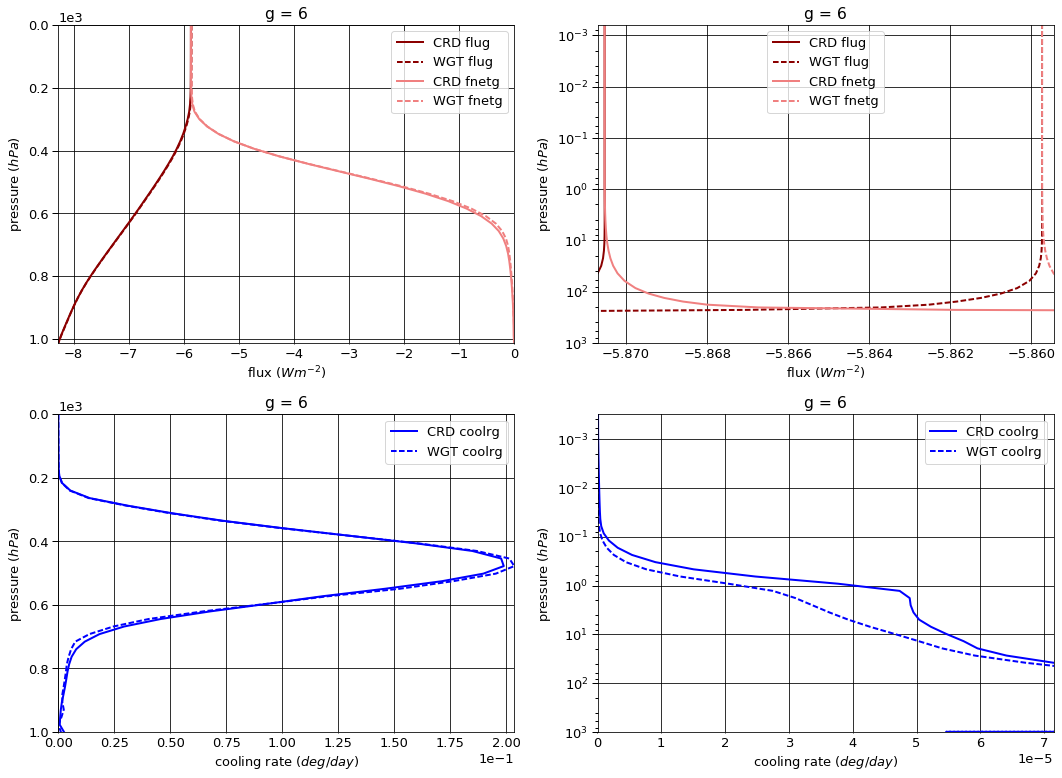

# Figure: flux, cooling rate g-group 7

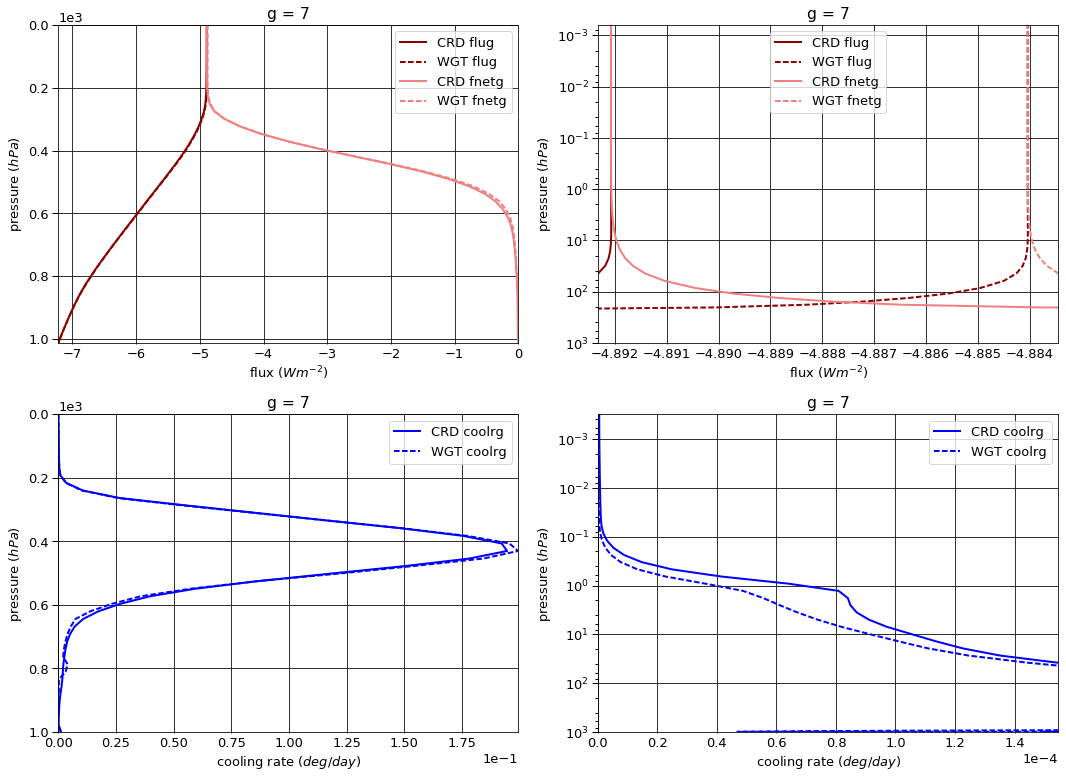

# Figure: flux, cooling rate g-group 8

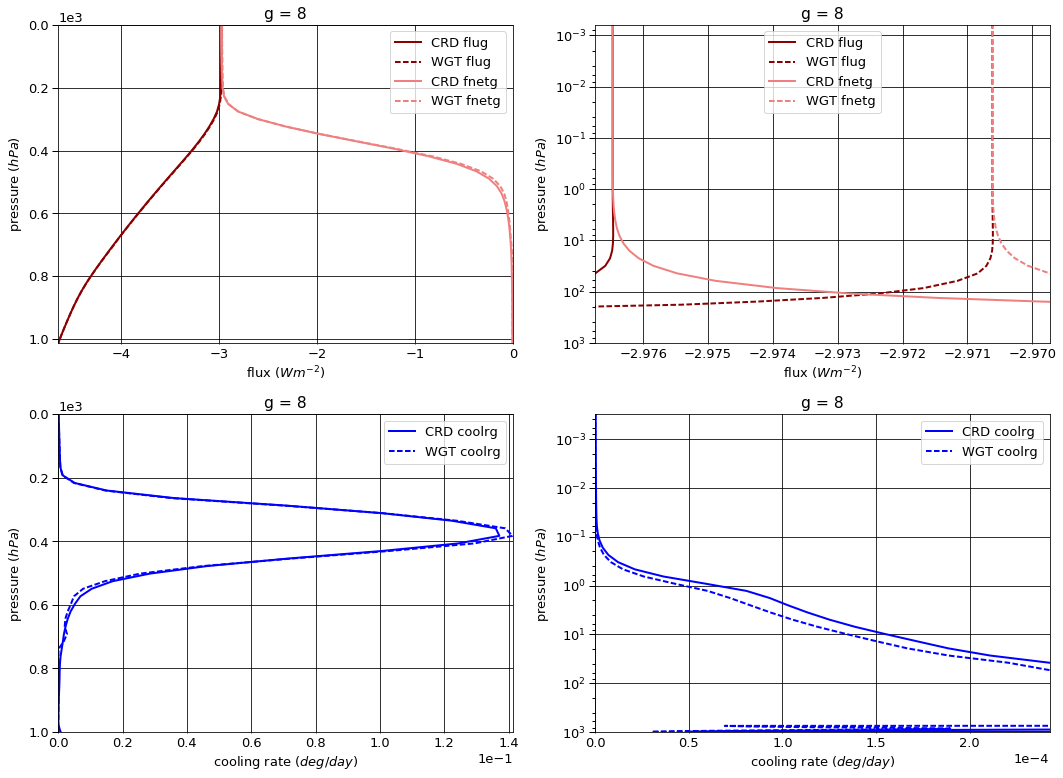

# Figure: flux, cooling rate g-group 9

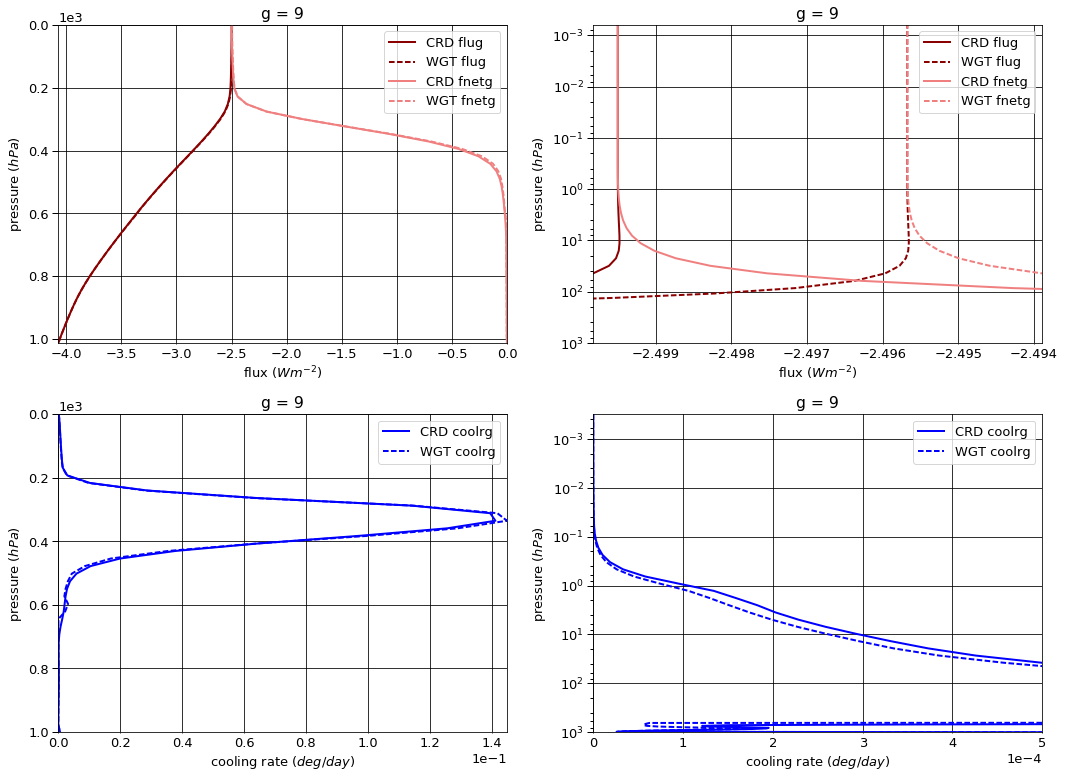

# Figure: flux, cooling rate g-group 10

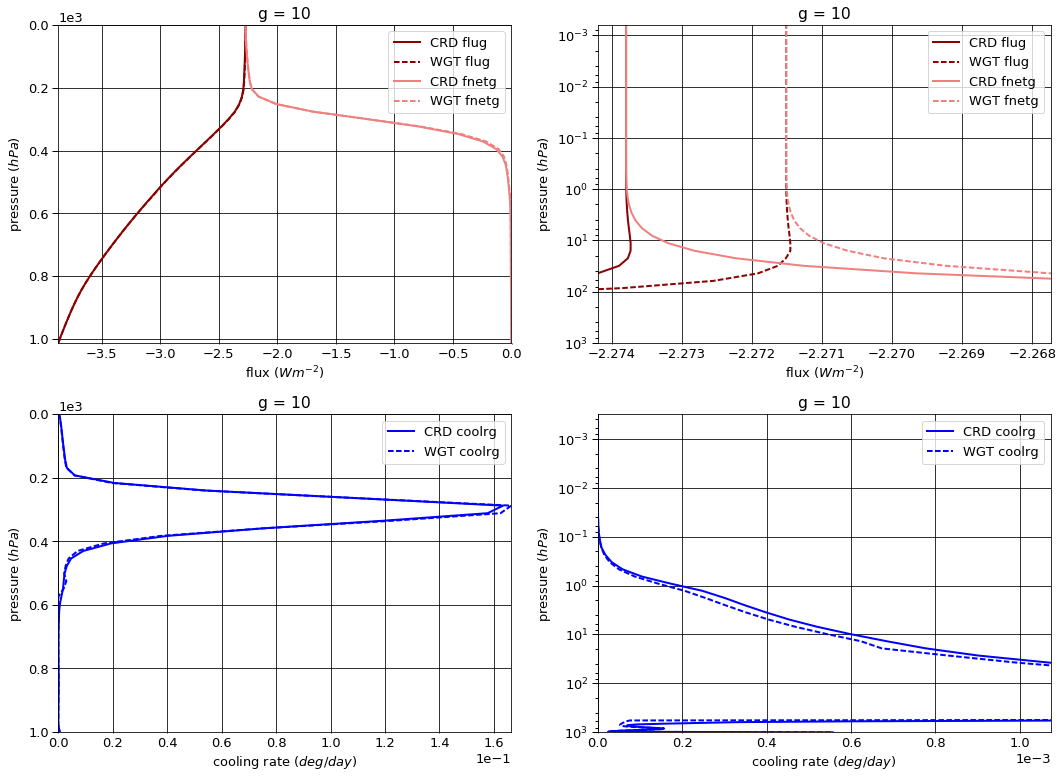

# Figure: flux, cooling rate g-group 11

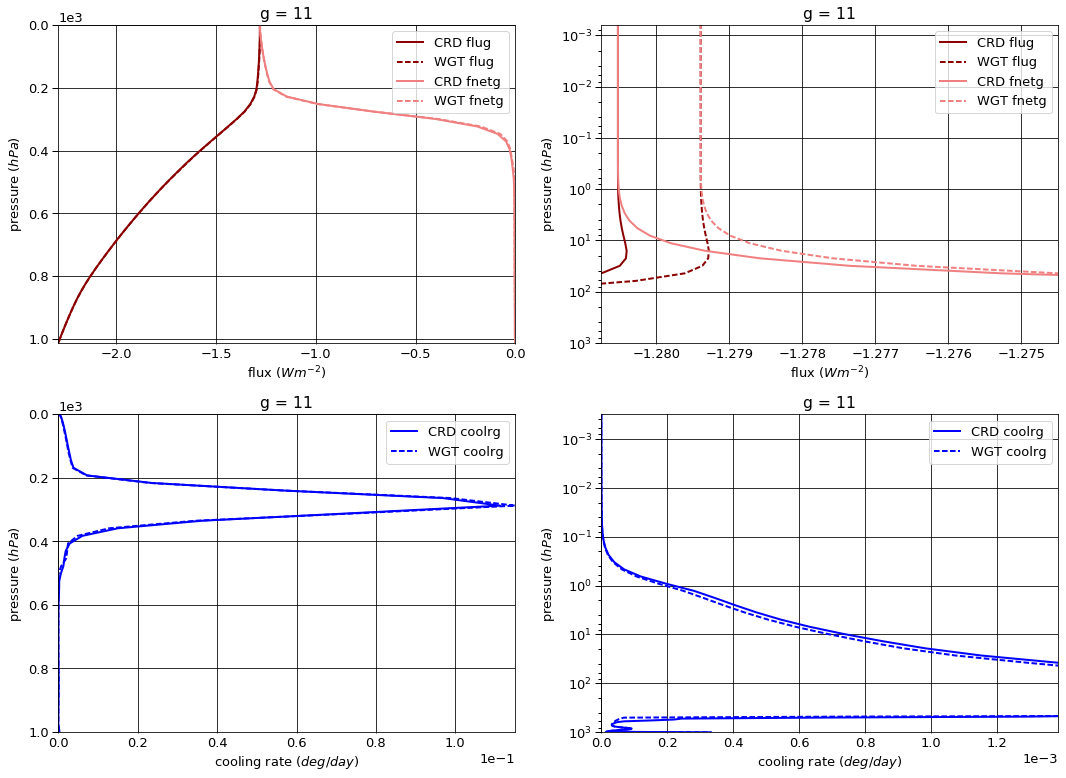

# Figure: flux, cooling rate g-group 12

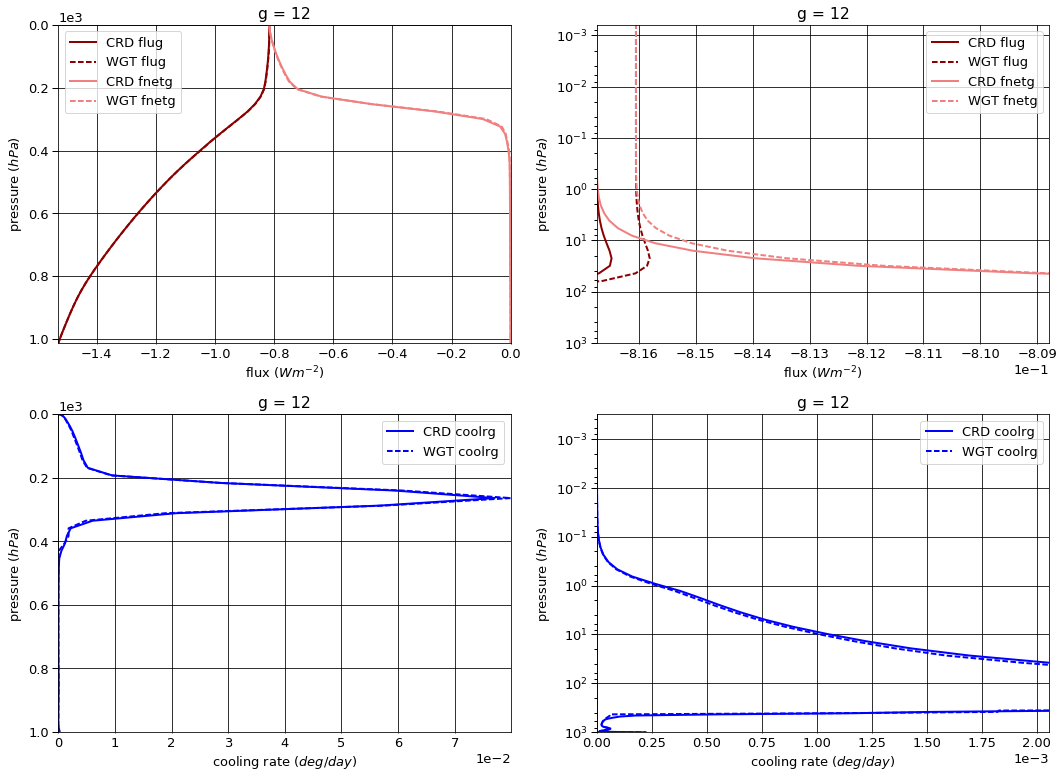

# Figure: flux, cooling rate g-group 13

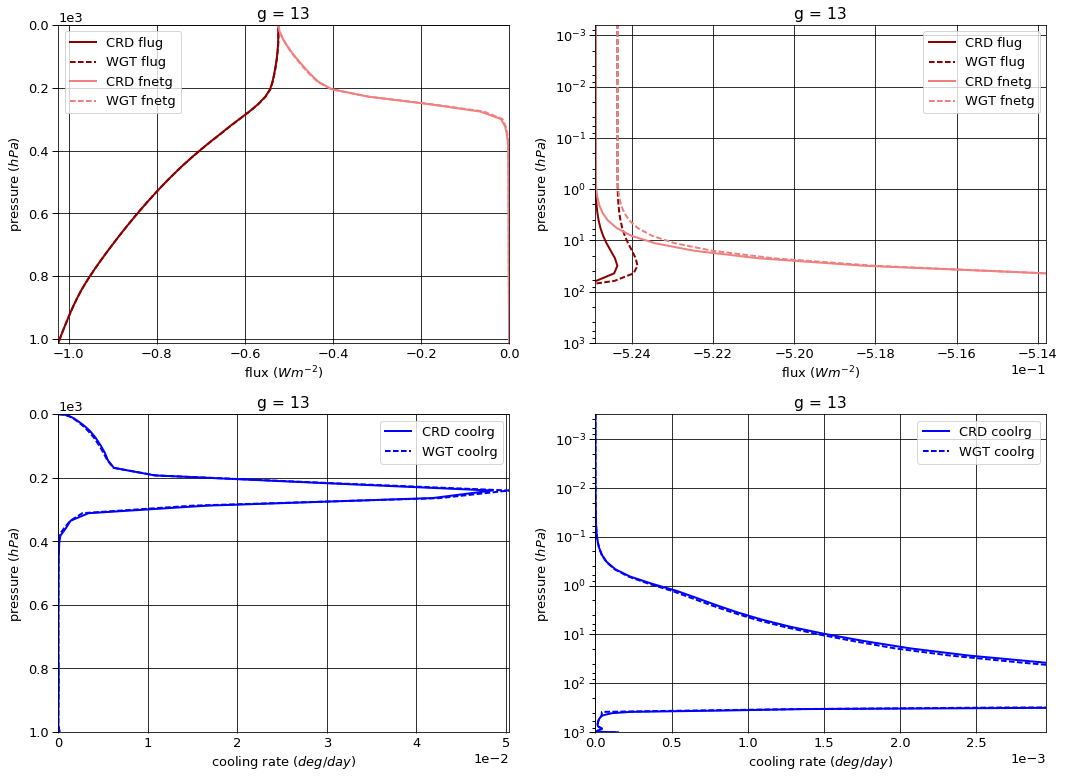

# Figure: flux, cooling rate g-group 14

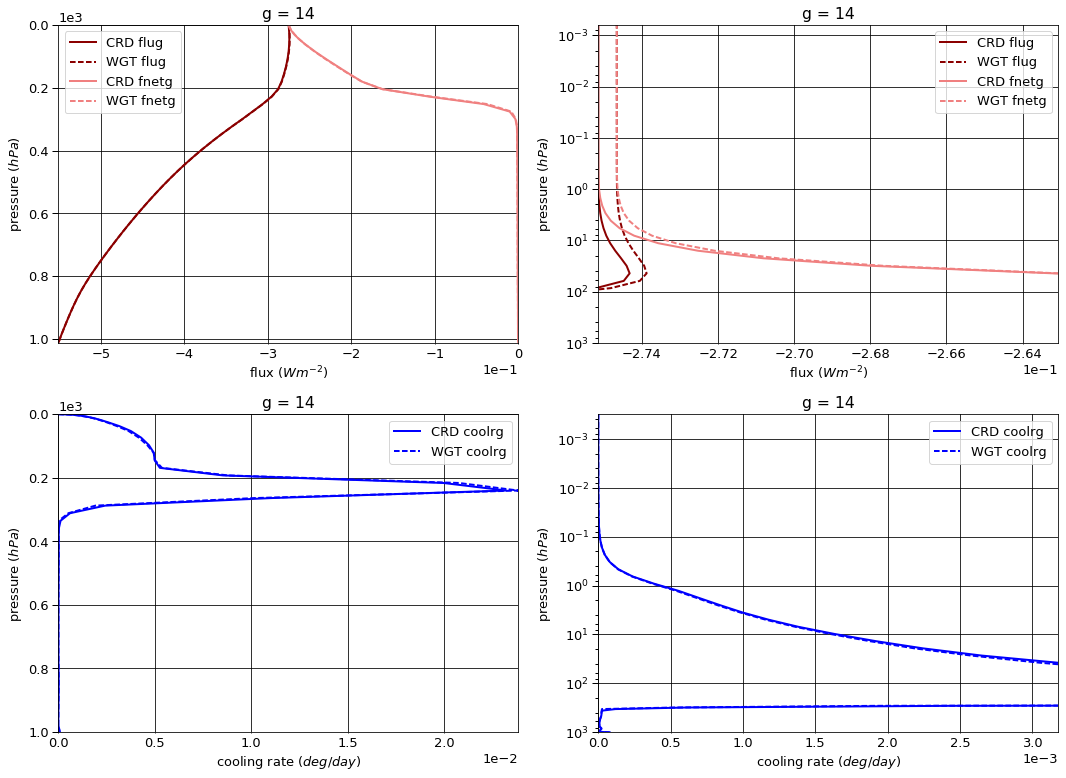

# Figure: flux, cooling rate g-group 15

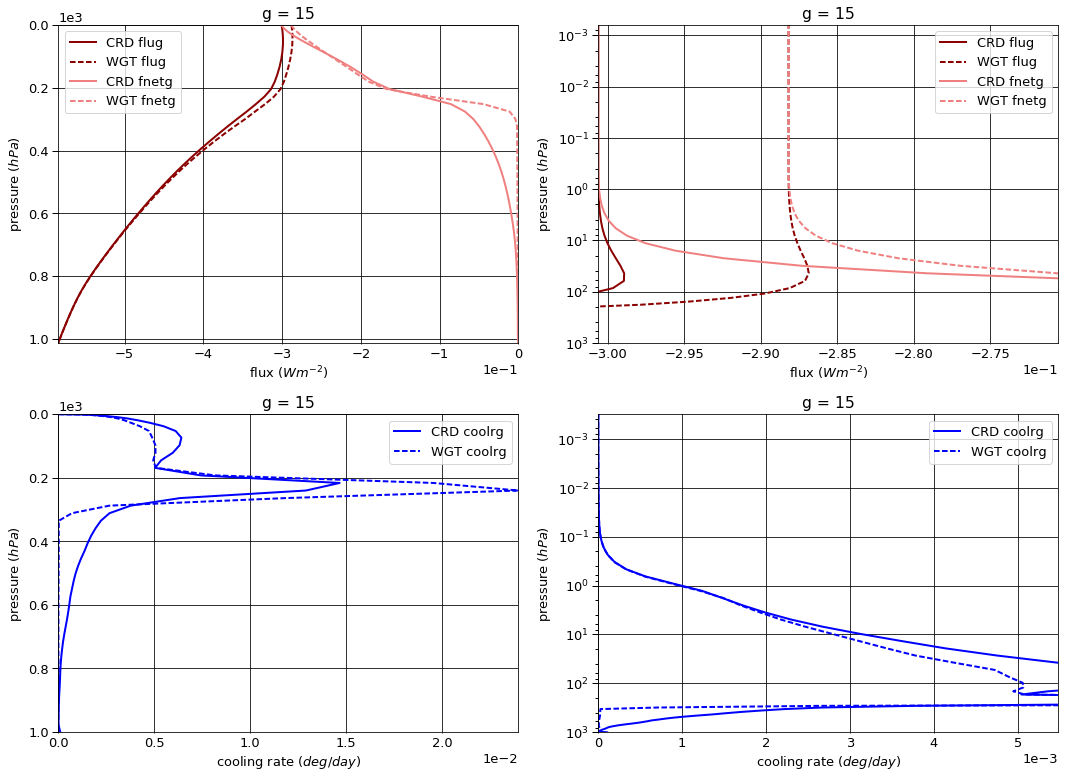

# Figure: flux, cooling rate g-group 16

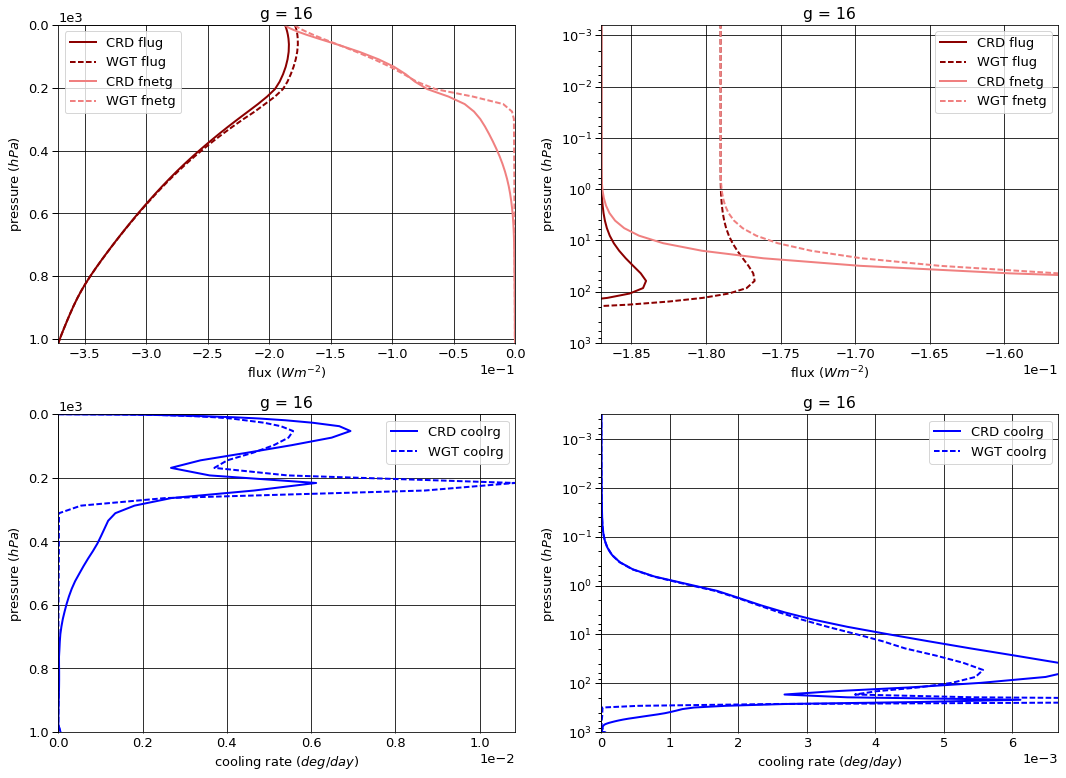

# Figure: flux, cooling rate g-group 17

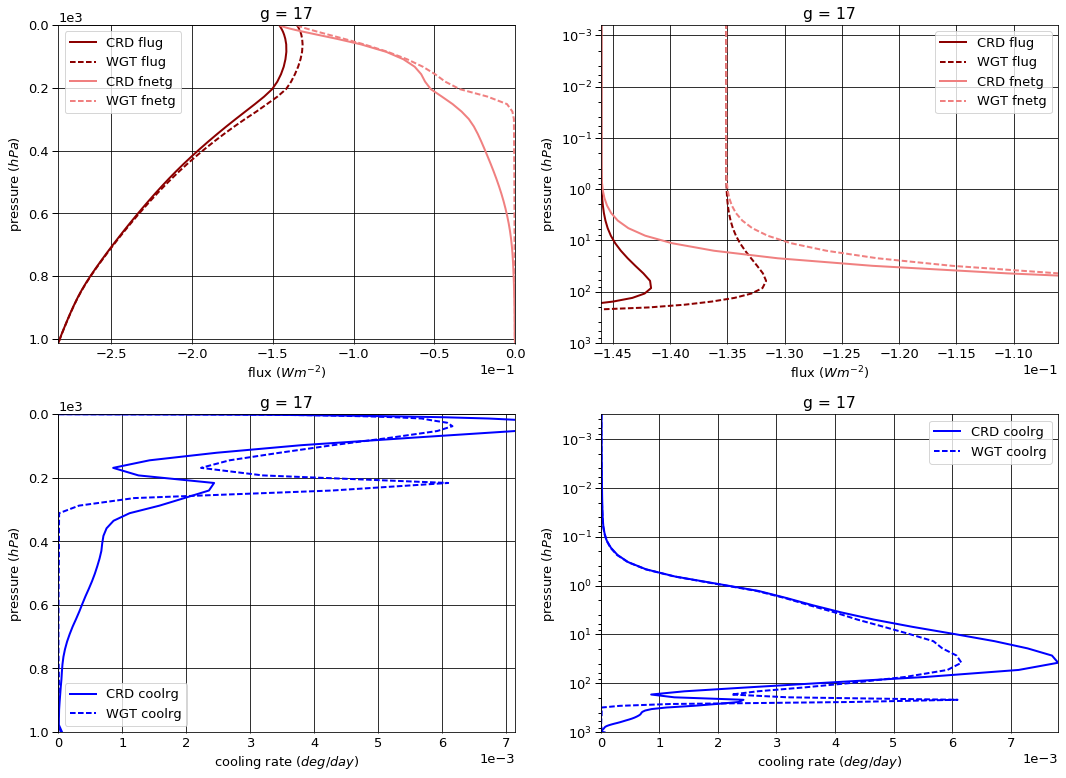

# Figure: flux, cooling rate g-group 18

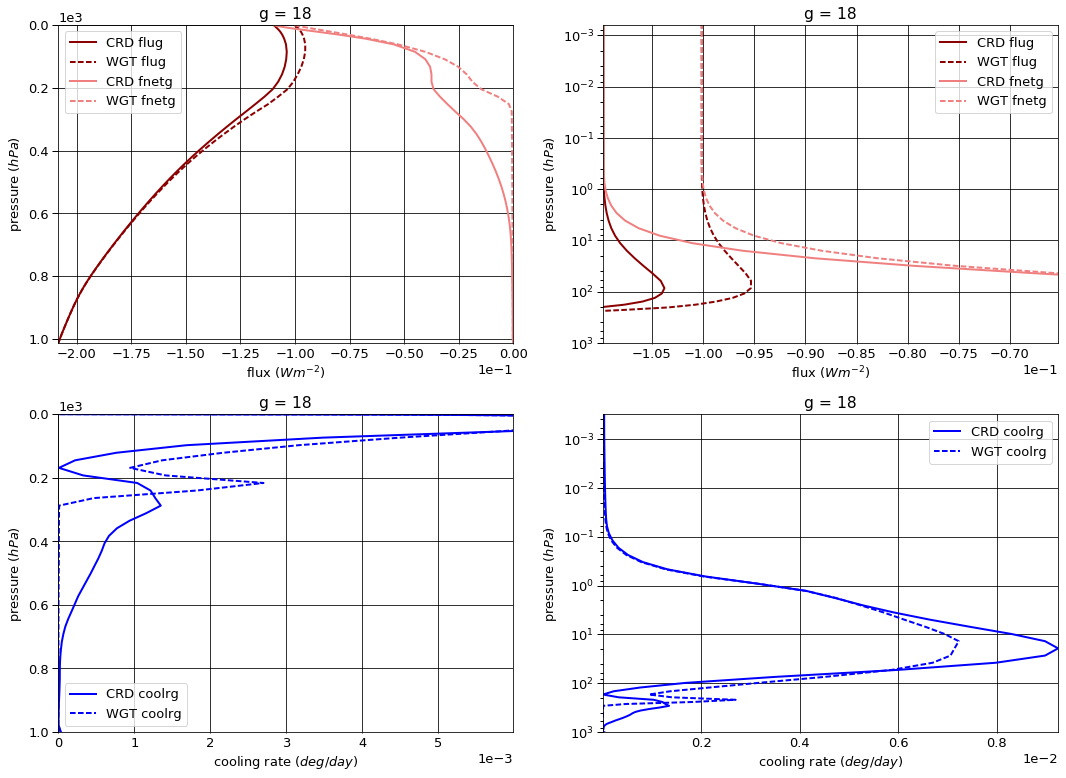

# Figure: flux, cooling rate g-group 19

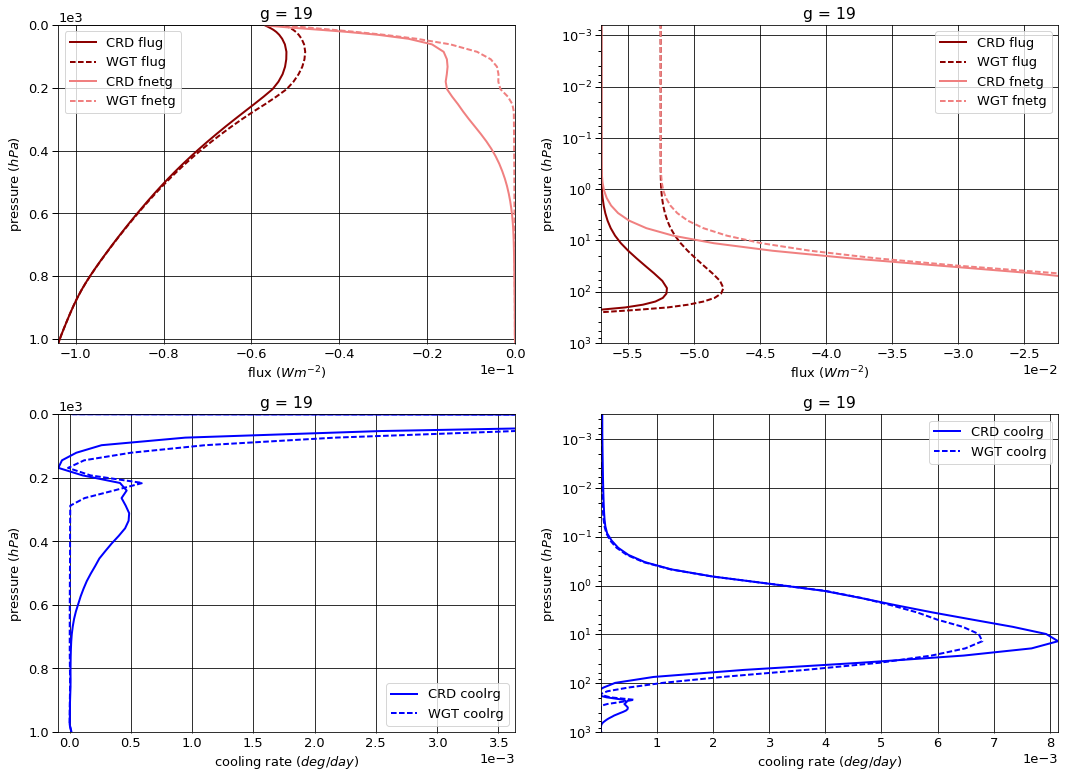

# Figure: flux, cooling rate g-group 20

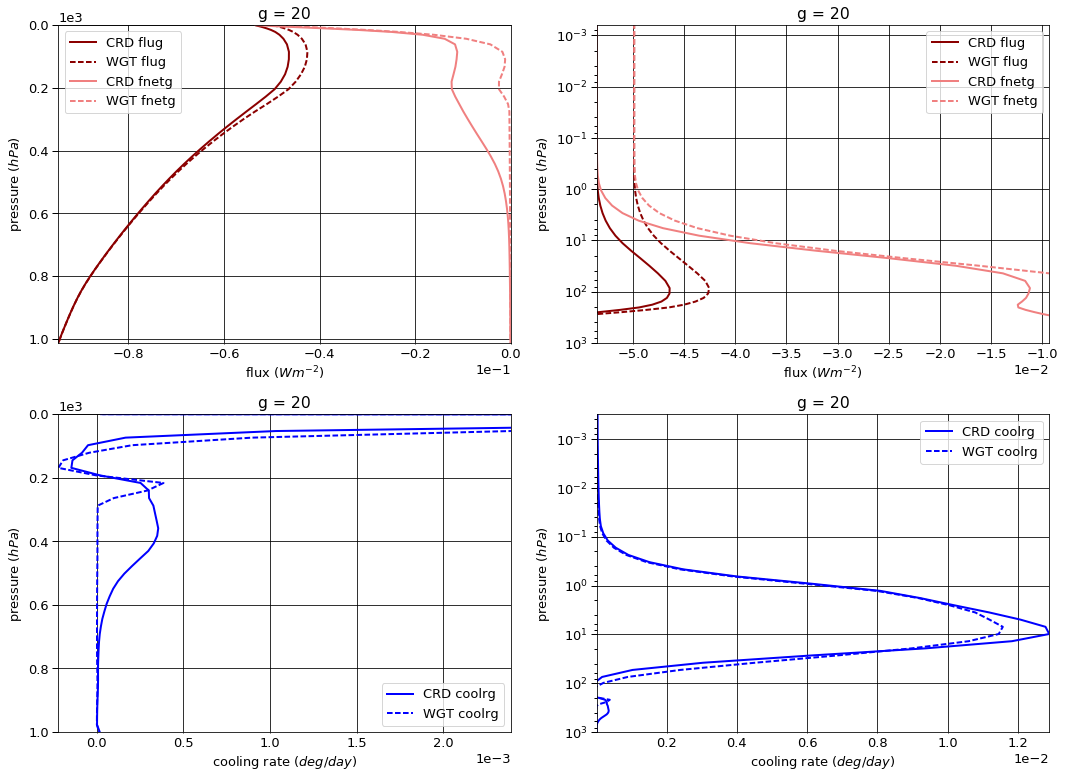

# Figure: flux, cooling rate g-group 21

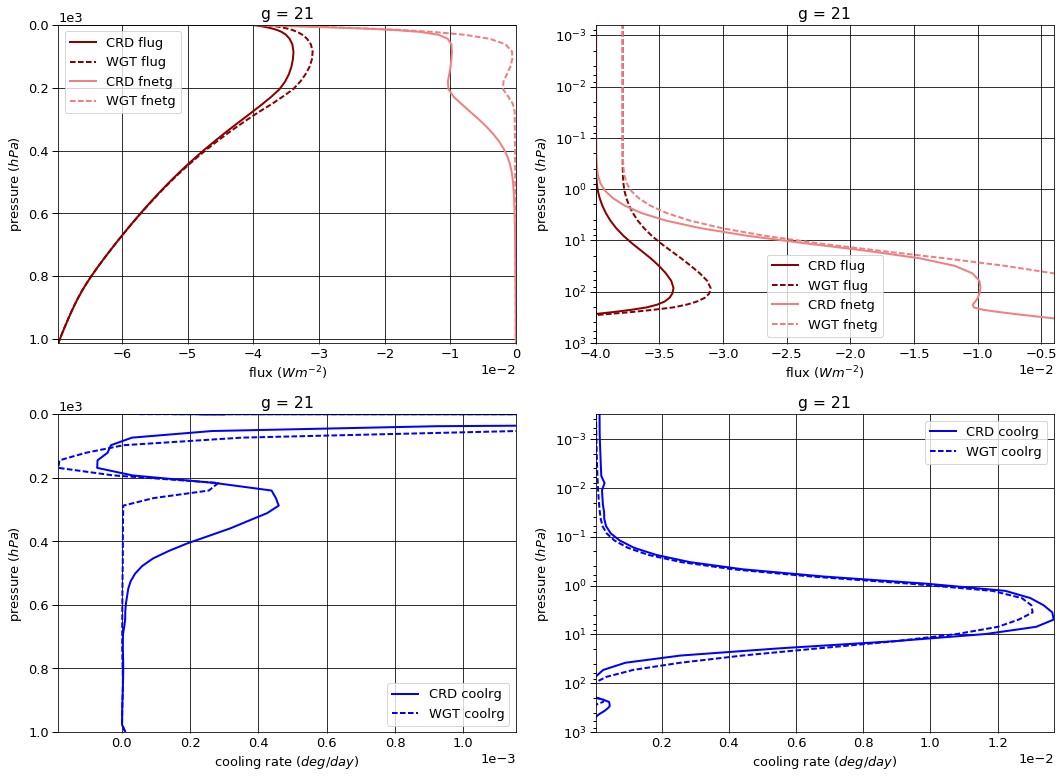

# Figure: flux, cooling rate g-group 22

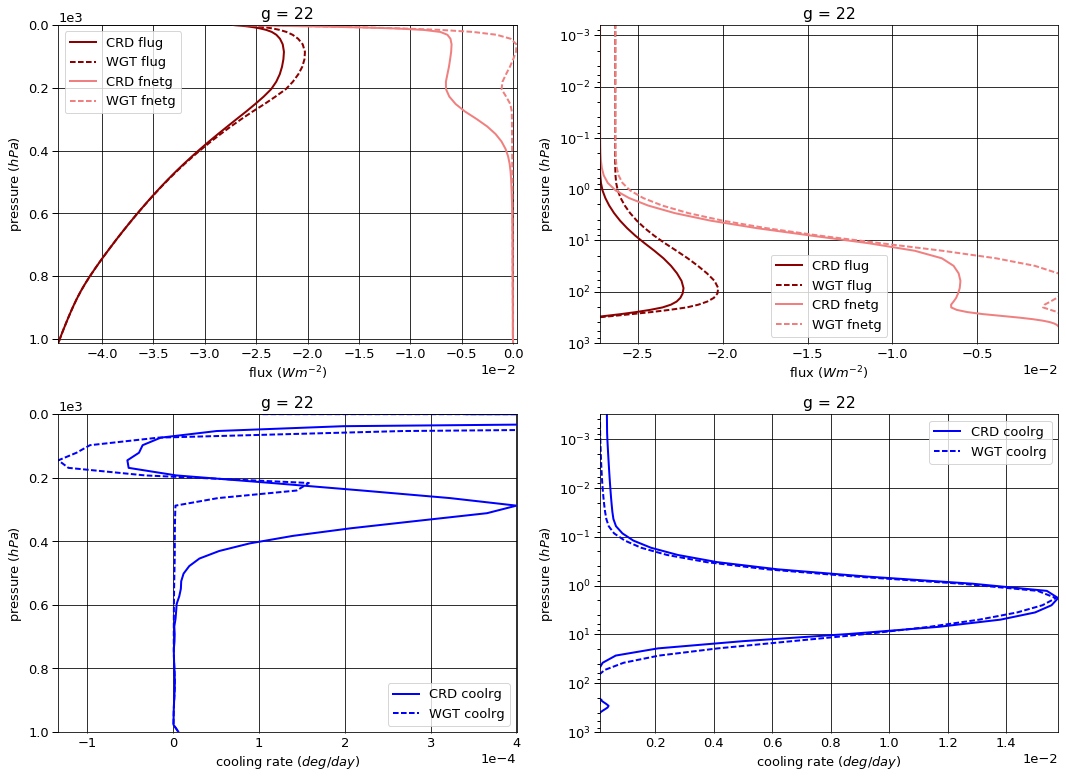

# Figure: flux, cooling rate g-group 23

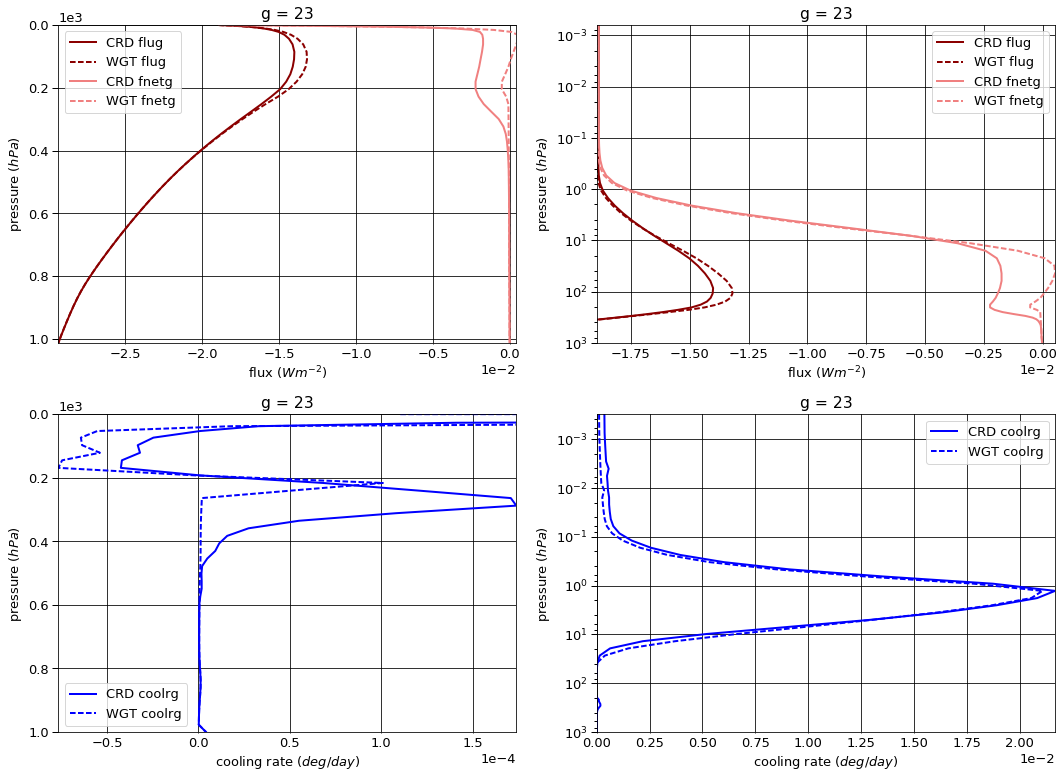

# Figure: flux, cooling rate g-group 24

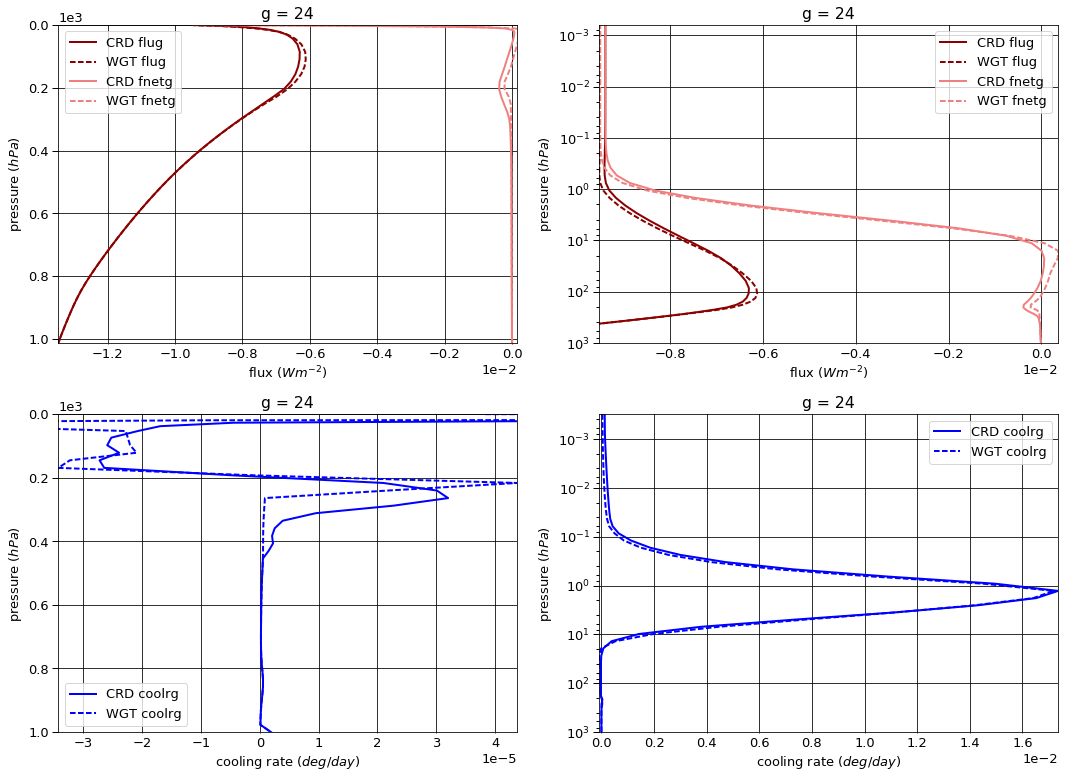

# Figure: flux, cooling rate g-group 25

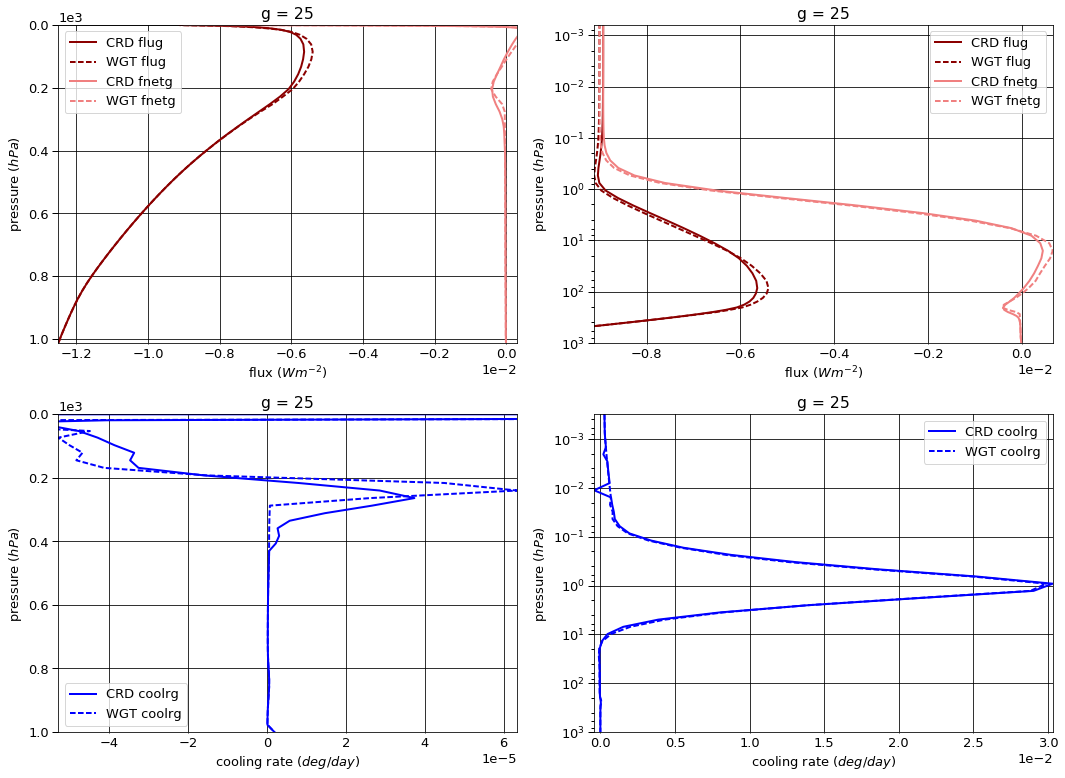

# Figure: flux, cooling rate g-group 26

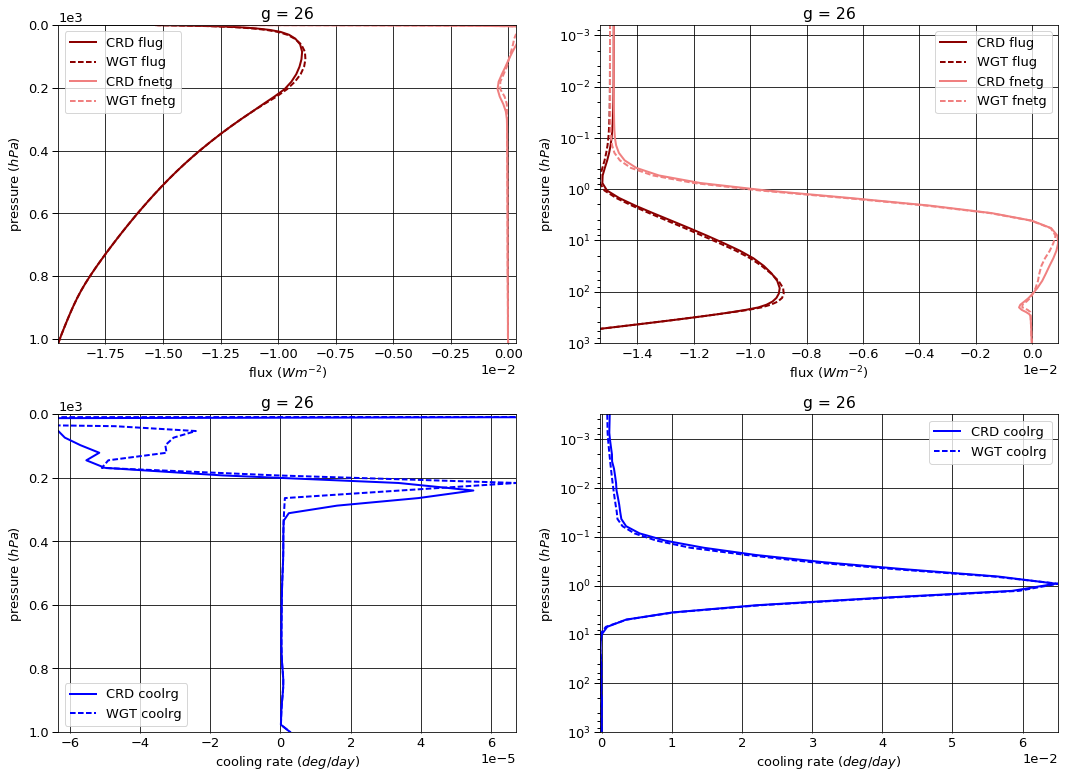

# Figure: flux, cooling rate g-group 27

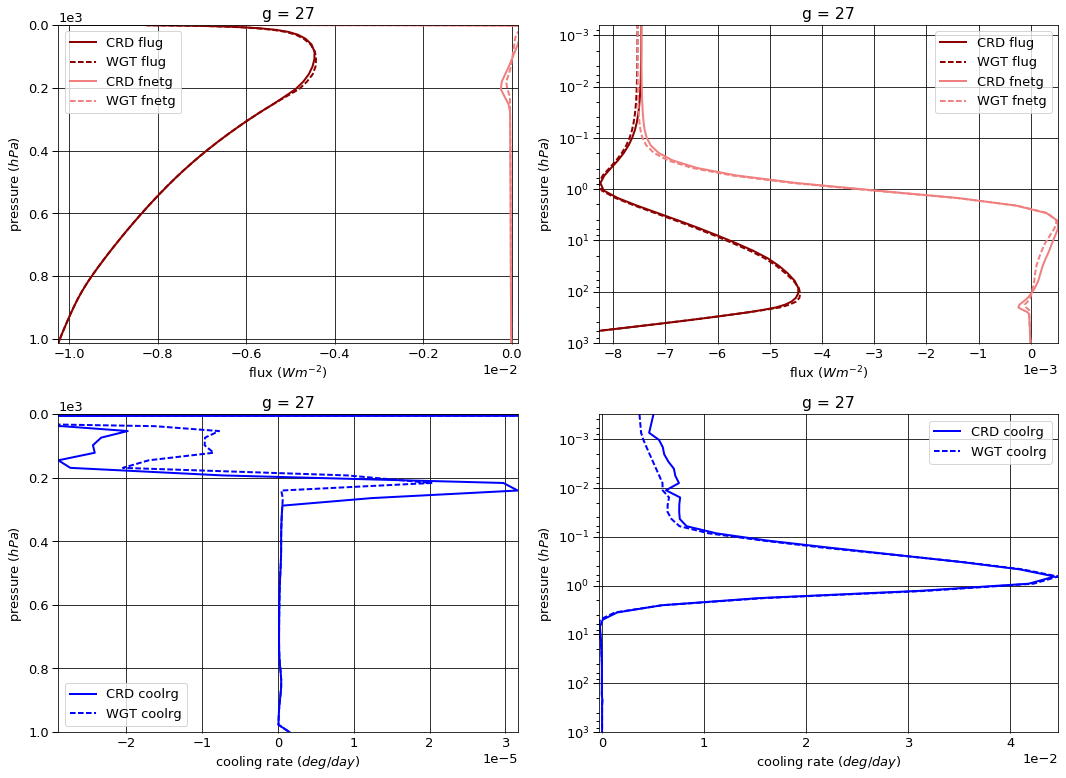

# Figure: flux, cooling rate g-group 28

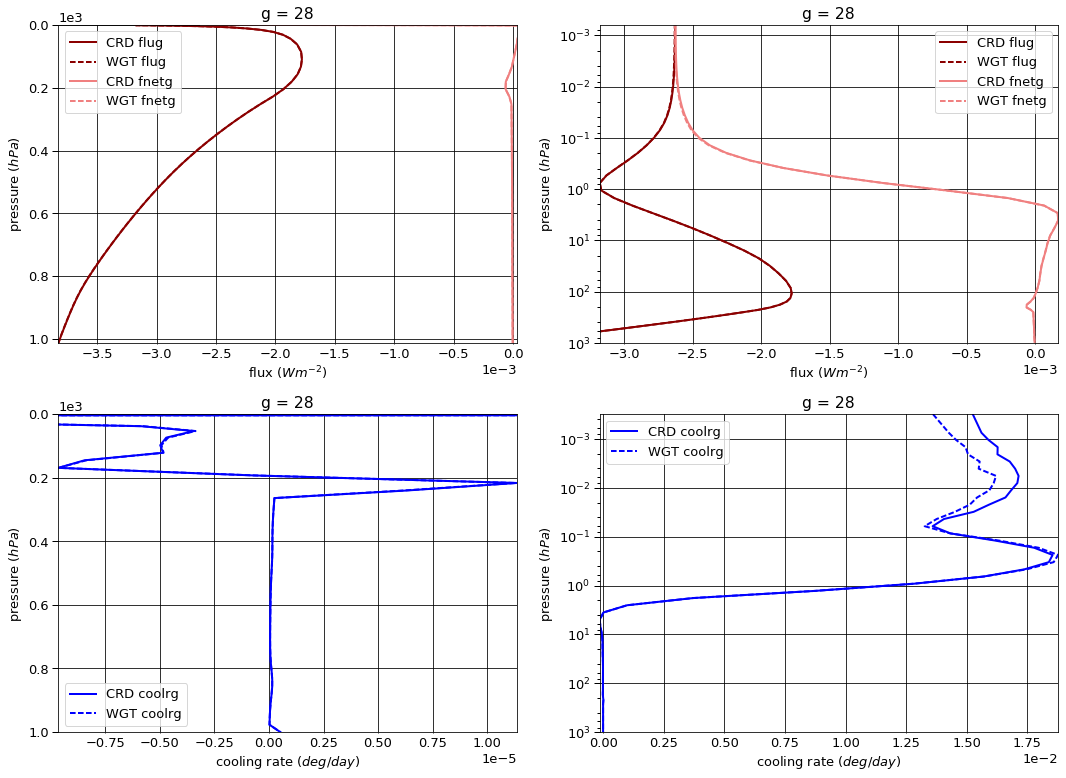

# Figure: flux, cooling rate g-group 29

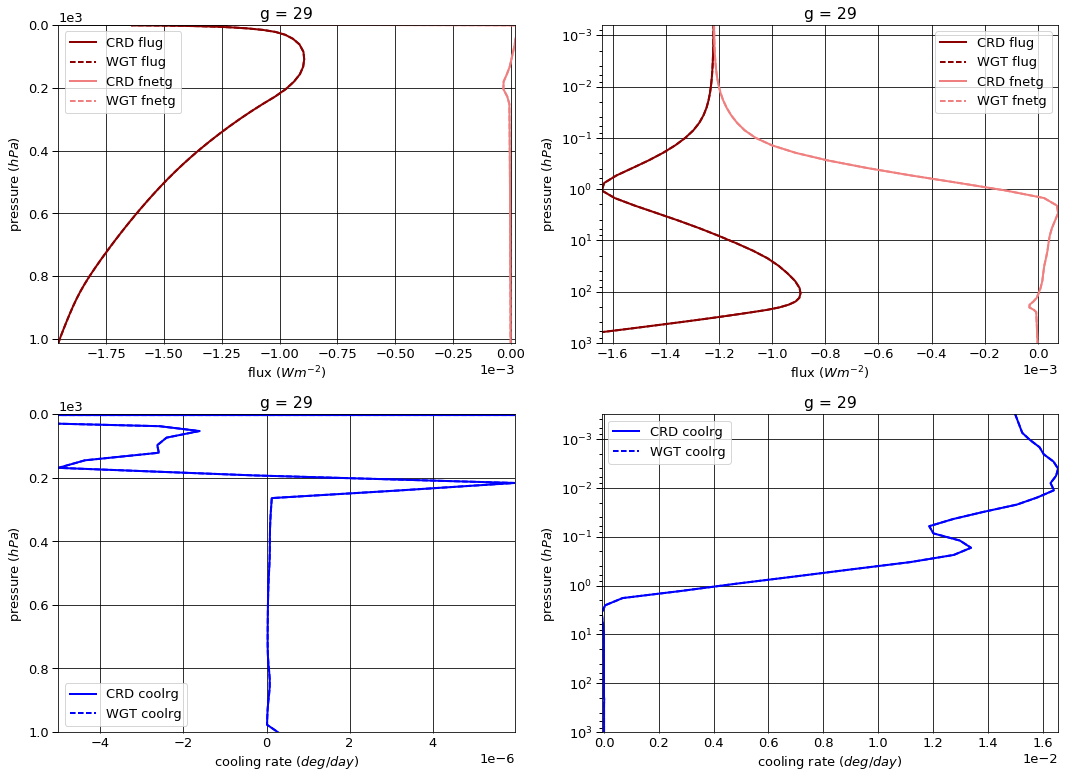

# Figure: flux, cooling rate g-group 30

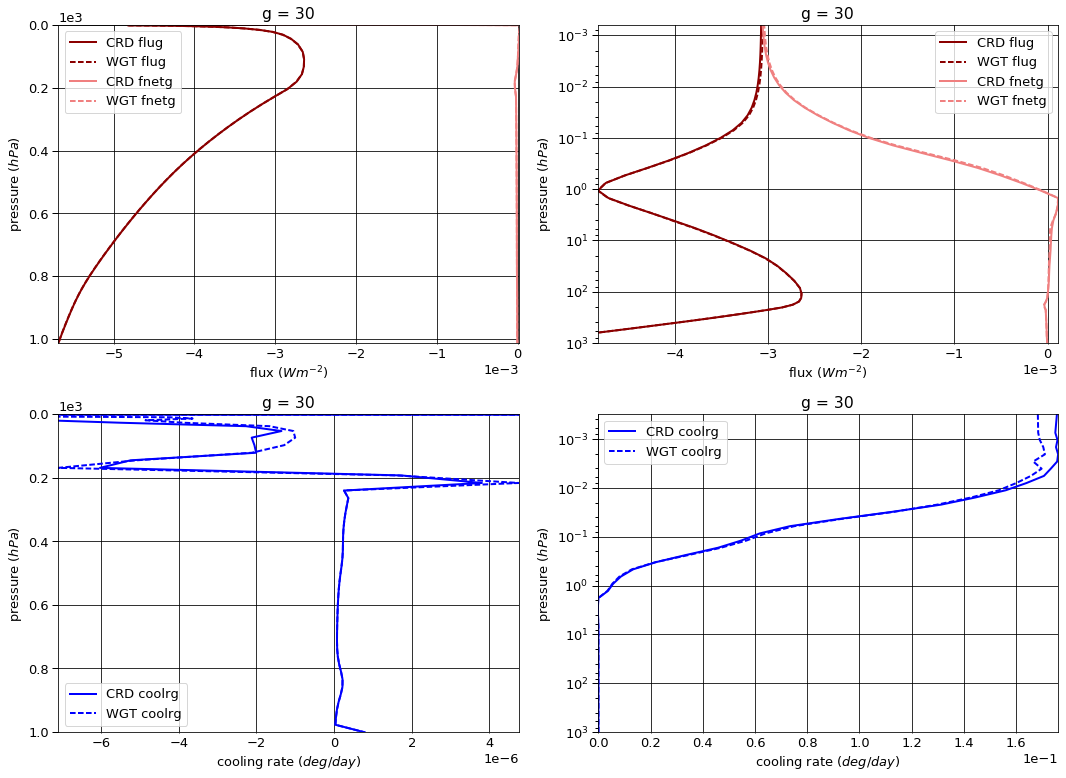

# Figure: flux, cooling rate g-group total

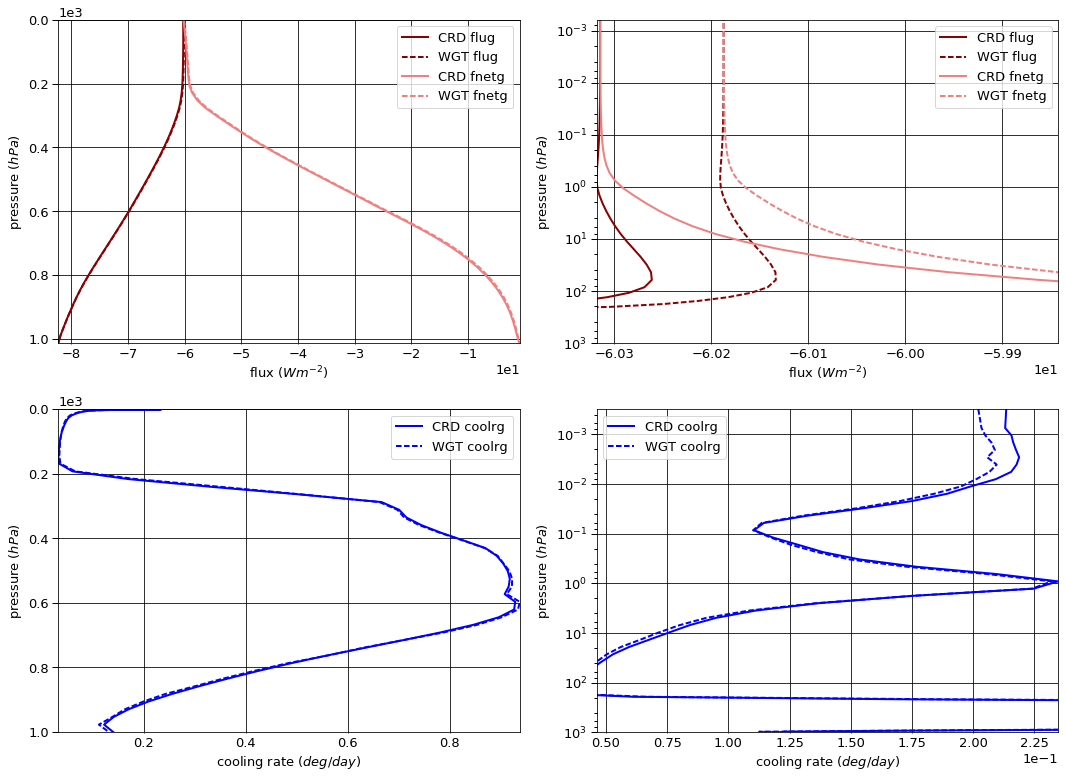

In [20]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [21]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg         fnetg
g  pressure level                                    
1  0.0      1      -3.242377   0.000000 -3.242377e+00
   1013.0   76     -3.571732   3.006878 -5.648544e-01
2  0.0      1      -5.767882   0.000000 -5.767882e+00
   1013.0   76     -6.686311   6.461831 -2.244806e-01
3  0.0      1      -9.902824   0.000000 -9.902824e+00
   1013.0   76    -11.997487  11.906658 -9.082957e-02
4  0.0      1      -9.632692   0.000000 -9.632692e+00
   1013.0   76    -12.245113  12.202242 -4.287075e-02
5  0.0      1      -9.371484   0.000000 -9.371484e+00
   1013.0   76    -12.481780  12.460234 -2.154599e-02
6  0.0      1      -5.870530   0.000000 -5.870530e+00
   1013.0   76     -8.276020   8.269165 -6.854246e-03
7  0.0      1      -4.892077   0.000000 -4.892077e+00
   1013.0   76     -7.221877   7.218301 -3.575224e-03
8  0.0      1      -2.976471   0.000000 -2.976471e+00
   1013.0   76     -4.643066   4.640990 -2.076219e-03
9  0.0      1      -2.499500   0.000000 -2.499500e+00
   1013.0   76     -4.071325   4.069686 -1.638583e-03
10 0.0      1      -2.273797   0.000000 -2.273797e+00
   1013.0   76     -3.871108   3.869567 -1.541358e-03
11 0.0      1      -1.280526   0.000000 -1.280526e+00
   1013.0   76     -2.290322   2.289404 -9.187963e-04
12 0.0      1      -0.816733   0.000000 -8.167333e-01
   1013.0   76     -1.529287   1.528674 -6.135783e-04
13 0.0      1      -0.524890   0.000000 -5.248899e-01
   1013.0   76     -1.023367   1.022957 -4.097145e-04
14 0.0      1      -0.275146   0.000000 -2.751460e-01
   1013.0   76     -0.551023   0.550806 -2.173319e-04
15 0.0      1      -0.300631   0.000000 -3.006312e-01
   1013.0   76     -0.584277   0.583976 -3.009138e-04
16 0.0      1      -0.187017   0.000000 -1.870165e-01
   1013.0   76     -0.371482   0.371327 -1.551466e-04
17 0.0      1      -0.145993   0.000000 -1.459933e-01
   1013.0   76     -0.282756   0.282578 -1.777635e-04
18 0.0      1      -0.109746   0.000000 -1.097464e-01
   1013.0   76     -0.208474   0.208375 -9.886046e-05
19 0.0      1      -0.057003   0.000000 -5.700290e-02
   1013.0   76     -0.103912   0.103867 -4.516756e-05
20 0.0      1      -0.053528   0.000000 -5.352776e-02
   1013.0   76     -0.094661   0.094613 -4.834456e-05
21 0.0      1      -0.039961   0.000000 -3.996084e-02
   1013.0   76     -0.069657   0.069628 -2.867657e-05
22 0.0      1      -0.027216   0.000000 -2.721555e-02
   1013.0   76     -0.044240   0.044222 -1.755808e-05
23 0.0      1      -0.018868   0.000000 -1.886829e-02
   1013.0   76     -0.029336   0.029324 -1.184039e-05
24 0.0      1      -0.009395   0.000000 -9.395201e-03
   1013.0   76     -0.013460   0.013455 -5.352831e-06
25 0.0      1      -0.008927   0.000000 -8.927346e-03
   1013.0   76     -0.012501   0.012495 -5.317422e-06
26 0.0      1      -0.014842   0.000000 -1.484232e-02
   1013.0   76     -0.019547   0.019539 -7.851031e-06
27 0.0      1      -0.007459   0.000000 -7.458624e-03
   1013.0   76     -0.010244   0.010240 -4.310505e-06
28 0.0      1      -0.002626   0.000000 -2.625759e-03
   1013.0   76     -0.003826   0.003825 -1.478670e-06
29 0.0      1      -0.001220   0.000000 -1.219689e-03
   1013.0   76     -0.001956   0.001955 -7.709598e-07
30 0.0      1      -0.003074   0.000000 -3.073616e-03
   1013.0   76     -0.005683   0.005681 -2.192051e-06


WGT


flug       fldg         fnetg
g  pressure level                                    
1  0.0      1      -3.240944   0.000000 -3.240944e+00
   1013.0   76     -3.571743   3.043989 -5.277533e-01
2  0.0      1      -5.764219   0.000000 -5.764219e+00
   1013.0   76     -6.686240   6.499258 -1.869819e-01
3  0.0      1      -9.889967   0.000000 -9.889967e+00
   1013.0   76    -11.997487  11.925277 -7.221029e-02
4  0.0      1      -9.618774   0.000000 -9.618774e+00
   1013.0   76    -12.244985  12.208344 -3.664131e-02
5  0.0      1      -9.361331   0.000000 -9.361331e+00
   1013.0   76    -12.481628  12.462449 -1.917938e-02
6  0.0      1      -5.859739   0.000000 -5.859739e+00
   1013.0   76     -8.276030   8.272563 -3.466998e-03
7  0.0      1      -4.884036   0.000000 -4.884036e+00
   1013.0   76     -7.221764   7.218803 -2.960922e-03
8  0.0      1      -2.970616   0.000000 -2.970616e+00
   1013.0   76     -4.643411   4.641506 -1.905293e-03
9  0.0      1      -2.495674   0.000000 -2.495674e+00
   1013.0   76     -4.071430   4.069795 -1.634698e-03
10 0.0      1      -2.271512   0.000000 -2.271512e+00
   1013.0   76     -3.871170   3.869629 -1.541410e-03
11 0.0      1      -1.279392   0.000000 -1.279392e+00
   1013.0   76     -2.290226   2.289307 -9.187249e-04
12 0.0      1      -0.816048   0.000000 -8.160479e-01
   1013.0   76     -1.529217   1.528604 -6.135386e-04
13 0.0      1      -0.524348   0.000000 -5.243483e-01
   1013.0   76     -1.023362   1.022952 -4.097232e-04
14 0.0      1      -0.274659   0.000000 -2.746594e-01
   1013.0   76     -0.551021   0.550804 -2.173362e-04
15 0.0      1      -0.288193   0.000000 -2.881934e-01
   1013.0   76     -0.584273   0.584038 -2.345273e-04
16 0.0      1      -0.179027   0.000000 -1.790268e-01
   1013.0   76     -0.371495   0.371347 -1.486668e-04
17 0.0      1      -0.135088   0.000000 -1.350882e-01
   1013.0   76     -0.282769   0.282655 -1.143476e-04
18 0.0      1      -0.100135   0.000000 -1.001351e-01
   1013.0   76     -0.208479   0.208394 -8.476460e-05
19 0.0      1      -0.052520   0.000000 -5.252004e-02
   1013.0   76     -0.103922   0.103880 -4.123528e-05
20 0.0      1      -0.049891   0.000000 -4.989105e-02
   1013.0   76     -0.094667   0.094629 -3.839391e-05
21 0.0      1      -0.037873   0.000000 -3.787258e-02
   1013.0   76     -0.069669   0.069641 -2.868792e-05
22 0.0      1      -0.026319   0.000000 -2.631918e-02
   1013.0   76     -0.044242   0.044224 -1.755892e-05
23 0.0      1      -0.018924   0.000000 -1.892376e-02
   1013.0   76     -0.029341   0.029329 -1.184446e-05
24 0.0      1      -0.009508   0.000000 -9.508252e-03
   1013.0   76     -0.013459   0.013454 -5.353152e-06
25 0.0      1      -0.009006   0.000000 -9.006453e-03
   1013.0   76     -0.012501   0.012496 -5.318175e-06
26 0.0      1      -0.014974   0.000000 -1.497448e-02
   1013.0   76     -0.019547   0.019540 -7.852130e-06
27 0.0      1      -0.007532   0.000000 -7.531706e-03
   1013.0   76     -0.010246   0.010241 -4.311214e-06
28 0.0      1      -0.002629   0.000000 -2.628905e-03
   1013.0   76     -0.003827   0.003826 -1.479610e-06
29 0.0      1      -0.001220   0.000000 -1.219604e-03
   1013.0   76     -0.001956   0.001955 -7.707752e-07
30 0.0      1      -0.003056   0.000000 -3.056068e-03
   1013.0   76     -0.005685   0.005683 -2.193779e-06


WGT - CRD


flug          fldg         fnetg
g  pressure level                                          
1  0.0      1      1.433100e-03  0.000000e+00  1.433100e-03
   1013.0   76    -1.020000e-05  3.711140e-02  3.710110e-02
2  0.0      1      3.662800e-03  0.000000e+00  3.662800e-03
   1013.0   76     7.100000e-05  3.742770e-02  3.749870e-02
3  0.0      1      1.285760e-02  0.000000e+00  1.285760e-02
   1013.0   76     0.000000e+00  1.861900e-02  1.861928e-02
4  0.0      1      1.391780e-02  0.000000e+00  1.391780e-02
   1013.0   76     1.280000e-04  6.102000e-03  6.229439e-03
5  0.0      1      1.015350e-02  0.000000e+00  1.015350e-02
   1013.0   76     1.520000e-04  2.215000e-03  2.366607e-03
6  0.0      1      1.079070e-02  0.000000e+00  1.079070e-02
   1013.0   76    -1.040000e-05  3.397700e-03  3.387248e-03
7  0.0      1      8.041200e-03  0.000000e+00  8.041200e-03
   1013.0   76     1.129000e-04  5.015000e-04  6.143019e-04
8  0.0      1      5.855000e-03  0.000000e+00  5.855000e-03
   1013.0   76    -3.452000e-04  5.161000e-04  1.709263e-04
9  0.0      1      3.826200e-03  0.000000e+00  3.826200e-03
   1013.0   76    -1.052000e-04  1.091000e-04  3.884700e-06
10 0.0      1      2.285300e-03  0.000000e+00  2.285300e-03
   1013.0   76    -6.150000e-05  6.150000e-05 -5.260000e-08
11 0.0      1      1.133800e-03  0.000000e+00  1.133800e-03
   1013.0   76     9.690000e-05 -9.680000e-05  7.138000e-08
12 0.0      1      6.854700e-04  0.000000e+00  6.854700e-04
   1013.0   76     6.980000e-05 -6.980000e-05  3.977000e-08
13 0.0      1      5.416000e-04  0.000000e+00  5.416000e-04
   1013.0   76     5.000000e-06 -5.000000e-06 -8.670000e-09
14 0.0      1      4.866500e-04  0.000000e+00  4.866500e-04
   1013.0   76     2.140000e-06 -2.140000e-06 -4.330000e-09
15 0.0      1      1.243785e-02  0.000000e+00  1.243785e-02
   1013.0   76     4.000000e-06  6.239000e-05  6.638650e-05
16 0.0      1      7.989690e-03  0.000000e+00  7.989690e-03
   1013.0   76    -1.351000e-05  1.999000e-05  6.479790e-06
17 0.0      1      1.090511e-02  0.000000e+00  1.090511e-02
   1013.0   76    -1.320000e-05  7.662000e-05  6.341594e-05
18 0.0      1      9.611380e-03  0.000000e+00  9.611380e-03
   1013.0   76    -5.490000e-06  1.958000e-05  1.409586e-05
19 0.0      1      4.482867e-03  0.000000e+00  4.482867e-03
   1013.0   76    -9.520000e-06  1.345000e-05  3.932279e-06
20 0.0      1      3.636702e-03  0.000000e+00  3.636702e-03
   1013.0   76    -5.843000e-06  1.579300e-05  9.950654e-06
21 0.0      1      2.088263e-03  0.000000e+00  2.088263e-03
   1013.0   76    -1.275700e-05  1.274600e-05 -1.135500e-08
22 0.0      1      8.963700e-04  0.000000e+00  8.963700e-04
   1013.0   76    -1.905000e-06  1.904000e-06 -8.380000e-10
23 0.0      1     -5.547000e-05  0.000000e+00 -5.547000e-05
   1013.0   76    -5.582000e-06  5.577000e-06 -4.068000e-09
24 0.0      1     -1.130513e-04  0.000000e+00 -1.130513e-04
   1013.0   76     3.740000e-07 -3.740000e-07 -3.203000e-10
25 0.0      1     -7.910710e-05  0.000000e+00 -7.910710e-05
   1013.0   76    -7.940000e-07  7.930000e-07 -7.520000e-10
26 0.0      1     -1.321560e-04  0.000000e+00 -1.321560e-04
   1013.0   76    -8.360000e-07  8.360000e-07 -1.099200e-09
27 0.0      1     -7.308170e-05  0.000000e+00 -7.308170e-05
   1013.0   76    -1.360000e-06  1.360000e-06 -7.086000e-10
28 0.0      1     -3.145800e-06  0.000000e+00 -3.145800e-06
   1013.0   76    -1.317700e-06  1.316800e-06 -9.398000e-10
29 0.0      1      8.510000e-08  0.000000e+00  8.510000e-08
   1013.0   76     2.446000e-07 -2.445000e-07  1.846600e-10
30 0.0      1      1.754710e-05  0.000000e+00  1.754710e-05
   1013.0   76    -2.214500e-06  2.212800e-06 -1.727700e-09

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1     -1.332905e-09
   1001.112500 75     4.821412e-02
2  0.000312    1     -2.915579e-08
   1001.112500 75     3.924460e-02
3  0.000312    1     -1.251009e-07
   1001.112500 75     2.458092e-02
4  0.000312    1     -1.012527e-07
   1001.112500 75     1.407638e-02
5  0.000312    1      1.965254e-07
   1001.112500 75     8.117312e-03
6  0.000312    1      1.451065e-07
   1001.112500 75     2.673862e-03
7  0.000312    1      4.653519e-07
   1001.112500 75     1.310426e-03
8  0.000312    1      3.001858e-07
   1001.112500 75     7.527693e-04
9  0.000312    1      1.112615e-07
   1001.112500 75     5.919628e-04
10 0.000312    1      1.239241e-07
   1001.112500 75     5.568307e-04
11 0.000312    1      9.970669e-08
   1001.112500 75     3.319132e-04
12 0.000312    1      1.339299e-07
   1001.112500 75     2.216536e-04
13 0.000312    1      5.071493e-08
   1001.112500 75     1.480096e-04
14 0.000312    1      1.669884e-08
   1001.112500 75     7.851670e-05
15 0.000312    1      2.109025e-06
   1001.112500 75     1.065793e-04
16 0.000312    1      3.310533e-06
   1001.112500 75     5.636576e-05
17 0.000312    1      1.027686e-05
   1001.112500 75     6.117969e-05
18 0.000312    1      3.176638e-05
   1001.112500 75     3.577945e-05
19 0.000312    1      3.149893e-05
   1001.112500 75     1.638229e-05
20 0.000312    1      3.784376e-05
   1001.112500 75     1.757757e-05
21 0.000312    1      1.543456e-04
   1001.112500 75     1.035804e-05
22 0.000312    1      3.419933e-04
   1001.112500 75     6.343081e-06
23 0.000312    1      3.623646e-04
   1001.112500 75     4.277176e-06
24 0.000312    1      1.256541e-04
   1001.112500 75     1.933744e-06
25 0.000312    1      2.729954e-04
   1001.112500 75     1.920443e-06
26 0.000312    1      1.160026e-03
   1001.112500 75     2.836152e-06
27 0.000312    1      5.037201e-03
   1001.112500 75     1.556847e-06
28 0.000312    1      1.524822e-02
   1001.112500 75     5.342725e-07
29 0.000312    1      1.500111e-02
   1001.112500 75     2.785405e-07
30 0.000312    1      1.756868e-01
   1001.112500 75     7.920275e-07


WGT


coolrg
g  pressure    layer              
1  0.000312    1     -3.902649e-10
   1001.112500 75     4.948343e-02
2  0.000312    1     -7.865339e-09
   1001.112500 75     3.686005e-02
3  0.000312    1     -1.664330e-08
   1001.112500 75     2.081005e-02
4  0.000312    1      9.102179e-09
   1001.112500 75     1.304405e-02
5  0.000312    1      7.298555e-08
   1001.112500 75     7.443861e-03
6  0.000312    1      7.531513e-08
   1001.112500 75     1.252199e-03
7  0.000312    1      1.454788e-07
   1001.112500 75     1.069510e-03
8  0.000312    1      8.719119e-08
   1001.112500 75     6.882083e-04
9  0.000312    1      3.456546e-08
   1001.112500 75     5.905239e-04
10 0.000312    1      4.180038e-08
   1001.112500 75     5.568496e-04
11 0.000312    1      3.277625e-08
   1001.112500 75     3.318874e-04
12 0.000312    1      4.637098e-08
   1001.112500 75     2.216392e-04
13 0.000312    1      2.479683e-08
   1001.112500 75     1.480127e-04
14 0.000312    1      1.556707e-08
   1001.112500 75     7.851825e-05
15 0.000312    1      1.295164e-06
   1001.112500 75     8.472184e-05
16 0.000312    1      1.638418e-06
   1001.112500 75     5.370606e-05
17 0.000312    1      7.195630e-06
   1001.112500 75     4.130625e-05
18 0.000312    1      1.712261e-05
   1001.112500 75     3.061887e-05
19 0.000312    1      1.544468e-05
   1001.112500 75     1.489679e-05
20 0.000312    1      1.917499e-05
   1001.112500 75     1.386905e-05
21 0.000312    1      5.060755e-05
   1001.112500 75     1.036213e-05
22 0.000312    1      1.041714e-04
   1001.112500 75     6.343384e-06
23 0.000312    1      1.104780e-04
   1001.112500 75     4.278643e-06
24 0.000312    1      3.834117e-05
   1001.112500 75     1.933858e-06
25 0.000312    1      2.774988e-04
   1001.112500 75     1.920714e-06
26 0.000312    1      8.086020e-04
   1001.112500 75     2.836547e-06
27 0.000312    1      3.662103e-03
   1001.112500 75     1.557103e-06
28 0.000312    1      1.360789e-02
   1001.112500 75     5.346114e-07
29 0.000312    1      1.500248e-02
   1001.112500 75     2.784739e-07
30 0.000312    1      1.683746e-01
   1001.112500 75     7.926504e-07


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1      9.426399e-10
   1001.112500 75     1.269310e-03
2  0.000312    1      2.129045e-08
   1001.112500 75    -2.384549e-03
3  0.000312    1      1.084576e-07
   1001.112500 75    -3.770868e-03
4  0.000312    1      1.103549e-07
   1001.112500 75    -1.032323e-03
5  0.000312    1     -1.235399e-07
   1001.112500 75    -6.734516e-04
6  0.000312    1     -6.979137e-08
   1001.112500 75    -1.421663e-03
7  0.000312    1     -3.198731e-07
   1001.112500 75    -2.409159e-04
8  0.000312    1     -2.129946e-07
   1001.112500 75    -6.456098e-05
9  0.000312    1     -7.669607e-08
   1001.112500 75    -1.438960e-06
10 0.000312    1     -8.212375e-08
   1001.112500 75     1.896000e-08
11 0.000312    1     -6.693043e-08
   1001.112500 75    -2.574000e-08
12 0.000312    1     -8.755894e-08
   1001.112500 75    -1.436000e-08
13 0.000312    1     -2.591809e-08
   1001.112500 75     3.100000e-09
14 0.000312    1     -1.131768e-09
   1001.112500 75     1.550000e-09
15 0.000312    1     -8.138607e-07
   1001.112500 75    -2.185751e-05
16 0.000312    1     -1.672115e-06
   1001.112500 75    -2.659703e-06
17 0.000312    1     -3.081225e-06
   1001.112500 75    -1.987344e-05
18 0.000312    1     -1.464377e-05
   1001.112500 75    -5.160571e-06
19 0.000312    1     -1.605425e-05
   1001.112500 75    -1.485499e-06
20 0.000312    1     -1.866877e-05
   1001.112500 75    -3.708524e-06
21 0.000312    1     -1.037381e-04
   1001.112500 75     4.091000e-09
22 0.000312    1     -2.378219e-04
   1001.112500 75     3.033000e-10
23 0.000312    1     -2.518866e-04
   1001.112500 75     1.466900e-09
24 0.000312    1     -8.731293e-05
   1001.112500 75     1.145000e-10
25 0.000312    1      4.503450e-06
   1001.112500 75     2.710000e-10
26 0.000312    1     -3.514242e-04
   1001.112500 75     3.954000e-10
27 0.000312    1     -1.375098e-03
   1001.112500 75     2.559000e-10
28 0.000312    1     -1.640327e-03
   1001.112500 75     3.389300e-10
29 0.000312    1      1.365000e-06
   1001.112500 75    -6.658000e-11
30 0.000312    1     -7.312210e-03
   1001.112500 75     6.228600e-10

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-60.314436,0.000000,-60.314436
1013.0,76,-82.315829,81.352492,-0.963338



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-60.187155,0.000000,-60.187155
1013.0,76,-82.315794,81.458613,-0.857182



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.127281,0.000000,0.127281
1013.0,76,0.000036,0.106121,0.106156


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.213509
1001.112500,75,0.141224



WGT


,,coolrg
pressure,layer,
0.000312,1,0.202099
1001.112500,75,0.132849



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.011410
1001.112500,75,-0.008375


In [22]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.039900,0.041031
2,0.075400,0.077748
3,0.140250,0.143317
4,0.144900,0.147431
5,0.152775,0.152548
6,0.101850,0.101409
7,0.091150,0.089330
8,0.058425,0.057410
9,0.052350,0.050802


In [23]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,0.000000e+00
2,3.373706e-24
3,7.152099e-24
4,1.516212e-23
5,3.214299e-23
6,6.814164e-23
7,1.444571e-22
8,3.062423e-22
9,6.492195e-22


In [27]:
def spreadsheet():
    ng = 30
    ighigh = 15
    pref_1, pref_2 = 1, 200
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom.loc[3:ng] / df_abscom_copy.loc[3:ng]
    df_absratio.columns = ['k(ig+1)/k(ig)']

    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    df_pref = pd.DataFrame((pref_1 * (df_dgdgs.index >= ighigh)
                            + pref_2 * (df_dgdgs.index < ighigh)),
                           index=df_dgdgs.index, columns=['pref'])    
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [28]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig+1)/k(ig),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,0.000000e+00,NaN,0.039900,0.041031,0.039900,0.041031,200
2,3.373706e-24,NaN,0.075400,0.077748,0.115300,0.118780,200
3,7.152099e-24,2.119954,0.140250,0.143317,0.255550,0.262096,200
4,1.516212e-23,2.119954,0.144900,0.147431,0.400450,0.409527,200
5,3.214299e-23,2.119953,0.152775,0.152548,0.553225,0.562075,200
6,6.814164e-23,2.119953,0.101850,0.101409,0.655075,0.663484,200
7,1.444571e-22,2.119953,0.091150,0.089330,0.746225,0.752814,200
8,3.062423e-22,2.119954,0.058425,0.057410,0.804650,0.810224,200
9,6.492195e-22,2.119953,0.052350,0.050802,0.857000,0.861026,200


In [29]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')